____

<font size=+3 color=#FFAA00> Classification: MNIST Dataset </font>

____

This ICA is part of a three-part series on applications of classification. We will examine:
* images,
* time series,
* sentiment analysis.

In addition to learning about, and comparing, three disparate applications of classification, we will continue to focus on the machine learning workflow and think about your project. 

There are two other goals we want to achieve with these three ICAs:
* we will have a contest among workflows,
* we will document our workflows each day, and improve in the next round.

We will use the [Delphi Method](https://www.rand.org/topics/delphi-method.html) to see if we can create the ultimate ML workflow! The way this will work is that you complete this ICA and put your ML workflow design in <font color=#FF2211> THIS DOCUMENT </font>. It is advisable to work on the document as you go. You can find the document through [this link](https://docs.google.com/document/d/19PrrWMYzKuKvObKHH1cjsY8gqkfNEhOk5hMtDid_bTk/edit?usp=sharing).

_Important_: Some of you may know ML estimators from other libraries, such as TensorFlow -- do not use them here. Only use `sklearn` so that we can share results among **all** of your classmates. 

<font size=+1 color=#00FFAA> Interlude on Projects </font> 

The topic of your project will be chosen by you. Now is the time to be thinking about what your project might be. You might already have an idea, from your thesis work, or perhaps an application we cover here triggers an idea for you. As we work through these three examples, compare what we are doing here to what you envision your project to be. 
_____

_____

<font size=+2 color=#00AAFF> MNIST Datasets </font>

The MNIST dataset is a classic in ML and you should become very familiar with it. Many ML benchmarks use this dataset, which you can learn more about the dataset and benchmarks [here](https://en.wikipedia.org/wiki/MNIST_database). 

<font size=+1 color=#00FFAA> MNIST Drop-Ins </font>

The MNIST dataset is so frequently used that we are able to get very accurate predictions. That might make us feel great, but it is not teaching us much: it is difficult to learn much about our workflow and the quality of our estimator if the predictions are nearly perfect. For this reason, datasets that have the same basic properties of the original MNIST have been developed, including the same number of:
* images,
* aspect ratio,
* pixels,
* training and testing images,
* number of classes.

These similar datasets are called "drop-ins" because these trivially "drop in" to your existing MNIST code with almost no changes. Some examples that allow you to explore even more applications within images are:
* [fashion](https://ai.plainenglish.io/fashion-mnist-as-an-alternative-to-the-mnist-dataset-38cd7e8a0ede),
* [sign language](https://www.kaggle.com/datasets/datamunge/sign-language-mnist),
* [japanese characters](https://paperswithcode.com/dataset/kuzushiji-mnist),
* [medical](https://medmnist.com).

____


<font size=+2 color=#00AAFF> Get the Data </font>

Ok, let's get to work! 

### Put the names of your group members here:

You will turn in one notebook as a group and you will complete [THIS DOCUMENT](https://docs.google.com/document/d/19PrrWMYzKuKvObKHH1cjsY8gqkfNEhOk5hMtDid_bTk/edit?usp=sharing).

In this first-of-three ICAs, I will give you a bit more of the code so that you can spend more time being creative. Ensure all of the code is correct, add comments and extend it as described below. 

In [1]:
# basics
import numpy as np
import matplotlib.pyplot as plt

# ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# datasets
from sklearn.datasets import fetch_openml

# for postprocess analysis
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
# display images
def display_images(images, labels, title, n=10):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

In [3]:
# Load MNIST digits dataset
mnist_data = fetch_openml('mnist_784', version=1)# you might want to add this in case you encounter error (parser='auto')
mnist_images_df = mnist_data.data
mnist_images = mnist_images_df.values.reshape((-1, 28, 28))
mnist_labels = mnist_data.target.astype(int)

# let's see what we have
# display_images(mnist_images, mnist_labels, 'MNIST Digits')


/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


What is `mnist_data`? That is, what type of Python container is it, what does it contain and what does `openml` generally return? 

<font size=+2 color=#00AAFF> Preprocess </font>

Related, let's look at one of the inputs. When we deal with images in ML it is important to keep track of the shape of the data because different ML estimators will handle the image in different ways. Try this code for several inputs - what is the shape? 




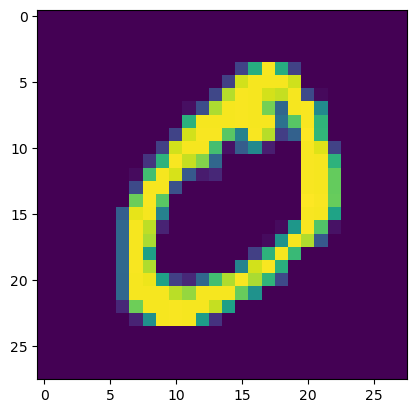

In [4]:
plt.imshow(mnist_images[1])

How do we get an _**image**_ into a ML estimator?! 

Have a discussion with your group on what the next two lines of code do. Describe in a markdown cell why we might want to perform these steps. And, can you imagine cases where we would not want to do this to the data? 

In [5]:
mnist_images_flattened = mnist_images.reshape((-1, 28 * 28))

(784,)

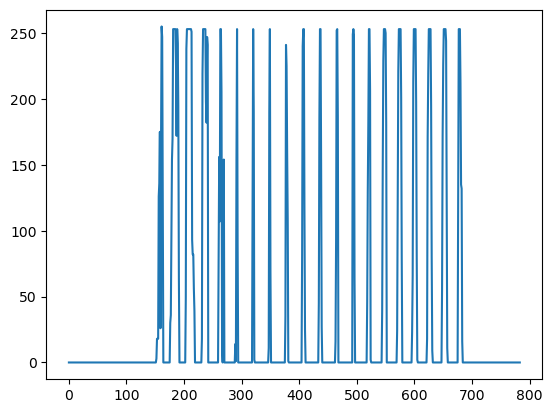

In [6]:
plt.plot(mnist_images_flattened[0])
mnist_images_flattened[0].shape

_____

Pause for a moment and consider any IDA, EDA preprocessing step your group may with to do. Do them now and document what you did; they will be in your final report.

_____

<font size=+2 color=#00AAFF> Machine Learning </font>

Next, we need to prepare for the ML steps. To obtain scores, we need to split the data.

In [7]:
# split the data into training and test sets
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(
    mnist_images_flattened[:1000], mnist_labels[0:1000], test_size=0.2, random_state=42)

_____

I'll set this up with one estimator. Have your group use the online documentation to use many more classifiers. 
____

In [8]:
# initialize: RandomForestClassifier
clf_digits = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
clf_digits.fit(X_train_digits, y_train_digits)

# using .predict
y_pred_digits = clf_digits.predict(X_test_digits)


# classification report and accuracy
print(classification_report(y_test_digits, y_pred_digits))
print(f"Accuracy: {accuracy_score(y_test_digits, y_pred_digits):.2f}")


              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       0.73      0.95      0.83        20
           2       0.90      0.86      0.88        22
           3       0.96      0.88      0.92        26
           4       0.71      1.00      0.83        15
           5       0.94      0.94      0.94        17
           6       1.00      0.87      0.93        23
           7       0.90      0.75      0.82        24
           8       0.92      0.92      0.92        13
           9       1.00      0.71      0.83        21

    accuracy                           0.88       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.90      0.88      0.88       200

Accuracy: 0.88


In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_probas_rfc = clf_digits.predict_proba(X_test_digits)
y_probas_rfc.shape
# precisions, recalls, _ = precision_recall_curve(y_train_digits,y_probas_rfc,pos_label='1')

(200, 10)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_digits, y_train_digits)

# using .predict
y_pred_digits_sgd = sgd_clf.predict(X_test_digits)

# classification report and accuracy
print(classification_report(y_test_digits, y_pred_digits_sgd))
print(f"Accuracy: {accuracy_score(y_test_digits, y_pred_digits_sgd):.2f}")




              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.79      0.95      0.86        20
           2       0.77      0.91      0.83        22
           3       0.92      0.92      0.92        26
           4       0.82      0.93      0.87        15
           5       0.93      0.76      0.84        17
           6       0.95      0.87      0.91        23
           7       0.95      0.79      0.86        24
           8       0.75      0.69      0.72        13
           9       0.89      0.76      0.82        21

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

Accuracy: 0.86


/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


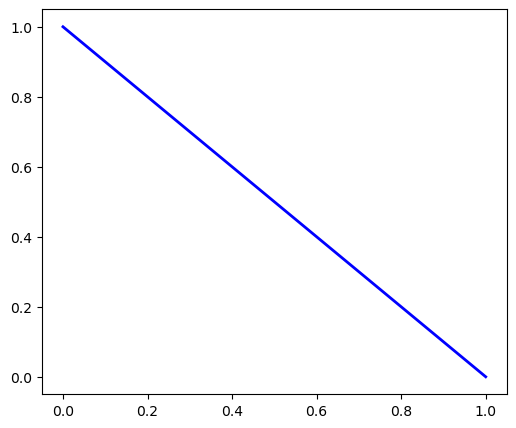

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict


y_probas_sgd = cross_val_predict(sgd_clf, X_train_digits, y_train_digits, cv=3,
                                    method="decision_function")
y_scores_sgd = y_probas_sgd[:, 3]

precisions, recalls, _ = precision_recall_curve(y_train_digits, y_scores_sgd,pos_label='1')

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, "b-", linewidth=2,label="SGD Classifier")


Think about any plots or other analysis you would like your group to perform better continuing. 

____
<font size=+2 color=#00AAFF> Analysis </font>
____

Text(0.5, 1.0, 'Confusion Matrix for MNIST Digits')

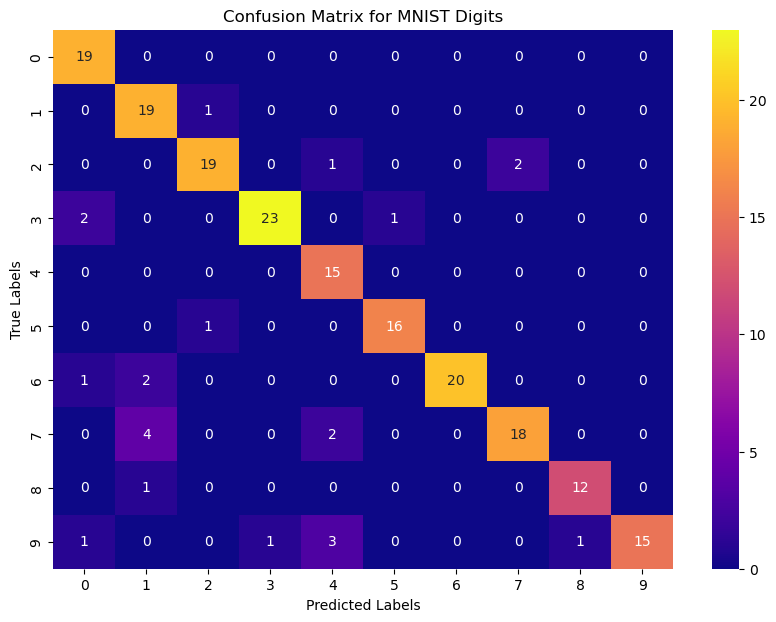

In [22]:
cm_digits = confusion_matrix(y_test_digits, y_pred_digits)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_digits, annot=True, fmt='d', cmap='plasma', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MNIST Digits')

_____

In the time that is remaining, there are two items to complete. 

You have the predicted labels and you know what the right answer is from the testing data. Plot several of the images that were misclassfied. Are you surprised these were misclassified? Do you think they would have fooled a human?

A more interesting interpretation arises from using `predict_proba`: here, you can see how the ML estimator is confusing different images. Create an interesting visualization that illustrates this; for example, pass a test image, get the prediction probabilities, show the image (e.g., with `imshow()`) and put a title/annotation with the probabilities of it being each of the possible numbers. 

Complete [THIS DOCUMENT](https://docs.google.com/document/d/19PrrWMYzKuKvObKHH1cjsY8gqkfNEhOk5hMtDid_bTk/edit?usp=sharing). 

____